<a href="https://colab.research.google.com/github/RafiDamayansyah/UTS-PENGOLAHAN-CITRA-DIGITAL/blob/main/UTS_PENGOLAHAN_CITA_DIGITAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

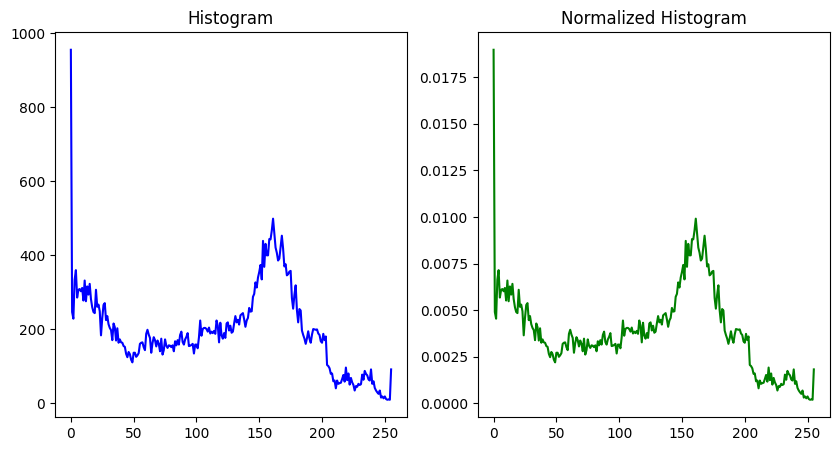

In [12]:
import cv2  # Mengimpor library OpenCV untuk pemrosesan citra
import numpy as np  # Mengimpor NumPy untuk operasi numerik
import matplotlib.pyplot as plt  # Mengimpor Matplotlib untuk visualisasi

# Mengunggah gambar dalam format grayscale
image = cv2.imread('/content/gedung satay.jpg', cv2.IMREAD_GRAYSCALE)
# Fungsi cv2.imread digunakan untuk membaca gambar dari file yang ditentukan. cv2.IMREAD_GRAYSCALE memastikan gambar dibaca dalam mode grayscale.

# Menghitung histogram dari gambar
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
# cv2.calcHist menghitung histogram dari gambar.
# [image] adalah input gambar, [0] menunjukkan kita menggunakan channel grayscale, None berarti tidak ada mask yang digunakan.
# [256] adalah jumlah bin histogram, dan [0, 256] adalah rentang nilai intensitas piksel.

# Normalisasi histogram untuk distribusi relatif
hist_normalized = hist / hist.sum()
# Normalisasi histogram dengan membagi nilai histogram dengan jumlah total piksel, sehingga totalnya menjadi 1.
# Ini memberikan distribusi frekuensi relatif.

# Menampilkan hasil histogram
plt.figure(figsize=(10, 5))  # Menyiapkan ukuran figure untuk tampilan
plt.subplot(1, 2, 1)  # Membagi tampilan menjadi 1 baris dan 2 kolom, pilih posisi pertama
plt.plot(hist, color='blue')  # Menampilkan histogram asli dengan warna biru
plt.title("Histogram")  # Memberikan judul "Histogram" pada grafik
plt.subplot(1, 2, 2)  # Pindah ke posisi kedua dalam subplot
plt.plot(hist_normalized, color='green')  # Menampilkan histogram yang telah dinormalisasi dengan warna hijau
plt.title("Normalized Histogram")  # Memberikan judul "Normalized Histogram" pada grafik
plt.show()  # Menampilkan hasil plot ke layar


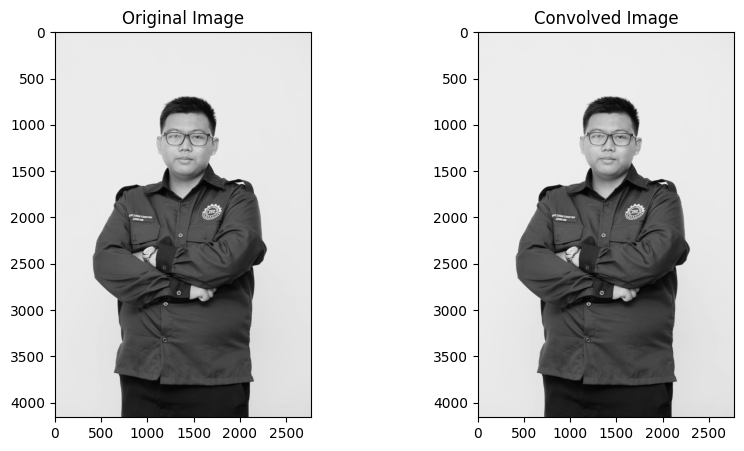

In [13]:
import cv2  # Mengimpor library OpenCV untuk pemrosesan citra
import numpy as np  # Mengimpor NumPy untuk operasi numerik
import matplotlib.pyplot as plt  # Mengimpor Matplotlib untuk visualisasi

# Mengunggah gambar dalam format grayscale
image = cv2.imread('/content/KNN Rafi PP.jpeg', cv2.IMREAD_GRAYSCALE)
# Fungsi cv2.imread digunakan untuk membaca gambar dari file yang ditentukan.
# cv2.IMREAD_GRAYSCALE memastikan gambar dibaca dalam mode grayscale (hitam putih).

# Membuat kernel 3x3 untuk konvolusi rata-rata
kernel = np.ones((3, 3), dtype=np.float32) / 9
# Membuat kernel 3x3 yang berisi nilai 1/9 di setiap elemen.
# Kernel ini digunakan untuk konvolusi rata-rata (smoothing), yang akan meratakan piksel sekitarnya.

# Melakukan operasi konvolusi pada gambar menggunakan kernel
convolved_image = cv2.filter2D(image, -1, kernel)
# Fungsi cv2.filter2D diterapkan pada gambar dengan menggunakan kernel rata-rata 3x3.
# Parameter -1 menunjukkan bahwa gambar output akan memiliki jumlah channel yang sama dengan gambar input (grayscale).

# Visualisasi Gambar Asli dan Gambar Konvolusi
plt.figure(figsize=(10, 5))  # Menyiapkan ukuran figure untuk tampilan
plt.subplot(1, 2, 1)  # Membagi tampilan menjadi 1 baris dan 2 kolom, pilih posisi pertama
plt.imshow(image, cmap='gray')  # Menampilkan gambar asli dalam mode grayscale
plt.title("Original Image")  # Memberikan judul "Original Image" pada gambar
plt.subplot(1, 2, 2)  # Pindah ke posisi kedua dalam subplot
plt.imshow(convolved_image, cmap='gray')  # Menampilkan gambar yang telah dikenai konvolusi
plt.title("Convolved Image")  # Memberikan judul "Convolved Image" pada gambar
plt.show()  # Menampilkan hasil plot ke layar



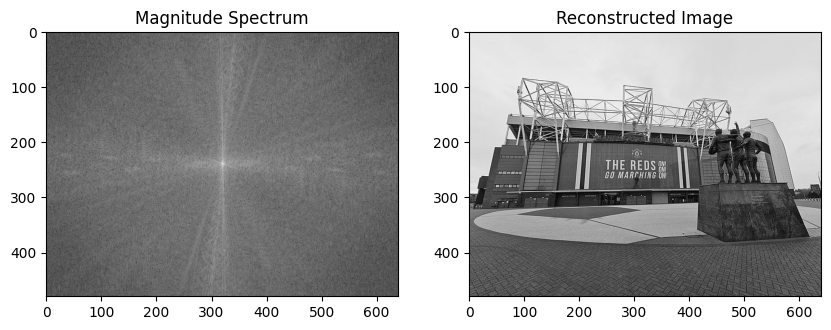

In [10]:
import cv2  # Mengimpor library OpenCV untuk pemrosesan citra
import numpy as np  # Mengimpor NumPy untuk operasi numerik
import matplotlib.pyplot as plt  # Mengimpor Matplotlib untuk visualisasi

# Mengunggah gambar dalam format grayscale
image = cv2.imread('/content/stadion_old_trafford_manchester_united.jpg', cv2.IMREAD_GRAYSCALE)
# cv2.imread digunakan untuk membaca gambar dari file yang ditentukan.
# cv2.IMREAD_GRAYSCALE memastikan gambar dibaca dalam mode grayscale (hitam putih).

# Melakukan Transformasi Fourier pada gambar
f_transform = np.fft.fft2(image)
# np.fft.fft2 melakukan Transformasi Fourier dua dimensi pada gambar.
# Ini mengubah citra dari domain spasial ke domain frekuensi.

# Menggeser komponen frekuensi rendah ke tengah
f_shifted = np.fft.fftshift(f_transform)
# np.fft.fftshift digunakan untuk menggeser komponen frekuensi rendah ke bagian tengah citra.
# Secara default, komponen frekuensi rendah ada di sudut kiri atas, dan fftshift memindahkannya ke pusat.

# Menghitung Magnitude Spectrum dari hasil transformasi
magnitude_spectrum = 20 * np.log(np.abs(f_shifted))
# np.abs(f_shifted) menghitung magnitudo dari komponen frekuensi.
# np.log digunakan untuk memperbesar perbedaan antara nilai frekuensi rendah dan tinggi agar lebih terlihat.
# Perkalian dengan 20 digunakan untuk memperbesar nilai tersebut (mirip dengan skala dB).

# Melakukan Inverse Fourier Transformasi untuk mendapatkan citra kembali
f_ishifted = np.fft.ifftshift(f_shifted)
# np.fft.ifftshift digunakan untuk membalikkan proses fftshift (menggeser komponen frekuensi kembali ke posisi semula).

image_reconstructed = np.abs(np.fft.ifft2(f_ishifted))
# np.fft.ifft2 melakukan Inverse Fourier Transform (IFT) untuk mengubah citra kembali ke domain spasial.
# np.abs digunakan untuk menghilangkan bagian imajiner yang muncul setelah IFT (karena transformasi dapat menghasilkan nilai imajiner).

# Visualisasi Magnitude Spectrum dan Gambar Hasil Invers Transformasi
plt.figure(figsize=(10, 5))  # Menyiapkan ukuran figure untuk tampilan
plt.subplot(1, 2, 1)  # Membagi tampilan menjadi 1 baris dan 2 kolom, pilih posisi pertama
plt.imshow(magnitude_spectrum, cmap='gray')  # Menampilkan magnitude spectrum dalam mode grayscale
plt.title("Magnitude Spectrum")  # Memberikan judul "Magnitude Spectrum" pada gambar
plt.subplot(1, 2, 2)  # Pindah ke posisi kedua dalam subplot
plt.imshow(image_reconstructed, cmap='gray')  # Menampilkan gambar hasil invers transformasi
plt.title("Reconstructed Image")  # Memberikan judul "Reconstructed Image" pada gambar
plt.show()  # Menampilkan hasil plot ke layar


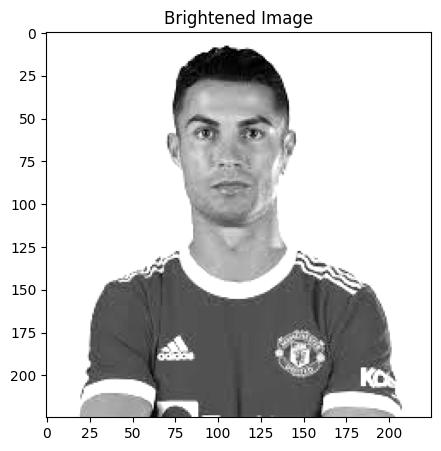

In [14]:
import cv2  # Mengimpor library OpenCV untuk pemrosesan citra
import numpy as np  # Mengimpor NumPy untuk operasi numerik
import matplotlib.pyplot as plt  # Mengimpor Matplotlib untuk visualisasi

# Mengunggah gambar dalam format grayscale
image = cv2.imread('/content/ronaldo.jpg', cv2.IMREAD_GRAYSCALE)
# cv2.imread digunakan untuk membaca gambar dari file yang ditentukan.
# cv2.IMREAD_GRAYSCALE memastikan gambar dibaca dalam mode grayscale (hitam putih).

# Menentukan konstanta untuk pencerahan
brightness_constant = 50
# brightness_constant adalah nilai yang akan ditambahkan ke setiap piksel gambar untuk meningkatkan kecerahan.

# Menambahkan konstanta pencerahan ke gambar
brightened_image = cv2.add(image, brightness_constant)
# cv2.add digunakan untuk menambahkan nilai brightness_constant ke setiap piksel gambar.
# Fungsi ini otomatis melakukan operasi clipping, memastikan nilai piksel tetap berada dalam rentang yang valid (0-255).

# Visualisasi Citra yang Ditingkatkan Pencerahannya
plt.figure(figsize=(5, 5))  # Menyiapkan ukuran figure untuk tampilan
plt.imshow(brightened_image, cmap='gray')  # Menampilkan gambar yang telah ditingkatkan pencerahannya dalam mode grayscale
plt.title("Brightened Image")  # Memberikan judul "Brightened Image" pada gambar
plt.show()  # Menampilkan hasil plot ke layar
